# Loan Prediction

## Problem 

- A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a data set.

## Data

- Variable Descriptions:


| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Y/N)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| Loan approved (Y/N)                            	|



In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics



In [89]:
df = pd.read_csv("train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [90]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [92]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [94]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Understanding the various features (columns) of the dataset.


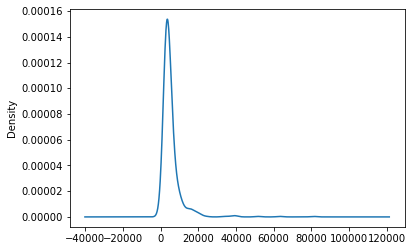

In [95]:
df.ApplicantIncome.plot.density()

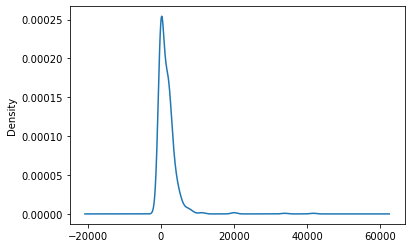

In [96]:
df.CoapplicantIncome.plot.density()

In [97]:


df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)

In [98]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [99]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

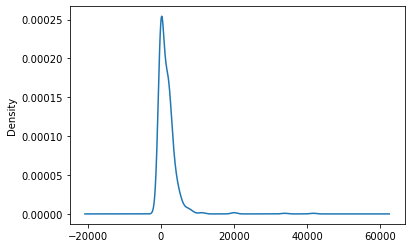

In [100]:
df.CoapplicantIncome.plot.density()

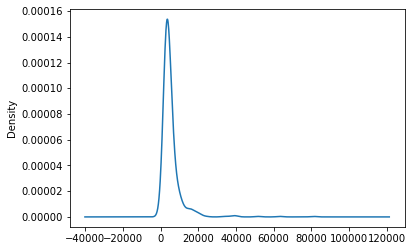

In [101]:
df.ApplicantIncome.plot.density()

In [102]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [103]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [104]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

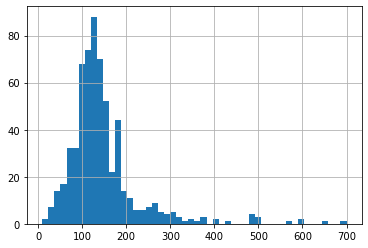

In [105]:
df['LoanAmount'].hist(bins=50)

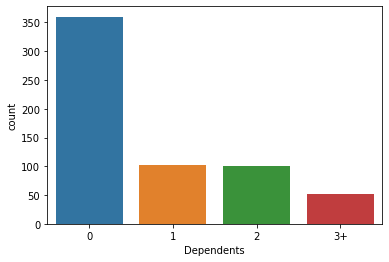

In [106]:
sns.countplot(df.Dependents)


# Outliers of LoanAmount and Applicant Income

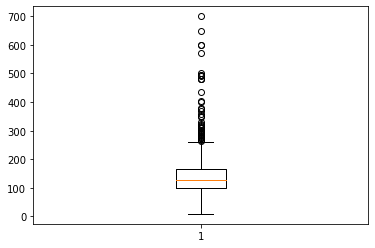

In [107]:
plt.boxplot(df['LoanAmount'])
d=plt.show()

In [108]:
d=df[df.LoanAmount<220]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f885c450f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f885c458a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f885c450290>],
 'medians': [<matplotlib.lines.Line2D at 0x7f885c45e4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f885c45e9d0>],
 'means': []}

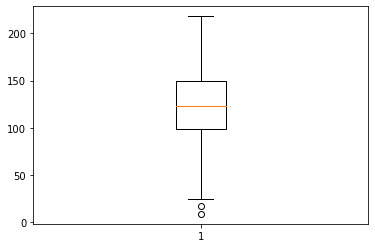

In [109]:
plt.boxplot(d['LoanAmount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f885c3bbdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f885c3c08d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f885c3bb110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f885c3bbe90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f885c3c8750>],
 'means': []}

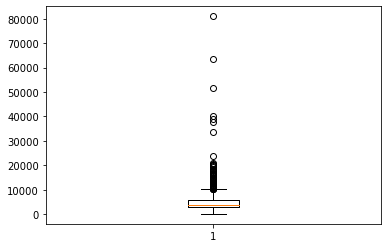

In [110]:
plt.boxplot(df['ApplicantIncome'])

In [111]:
f=d[d.ApplicantIncome<7500]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f885c3330d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f885c333b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f885c32b3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f885c339610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f885c339b10>],
 'means': []}

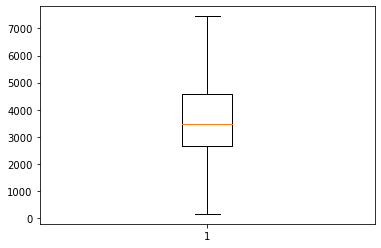

In [112]:
plt.boxplot(f['ApplicantIncome'])

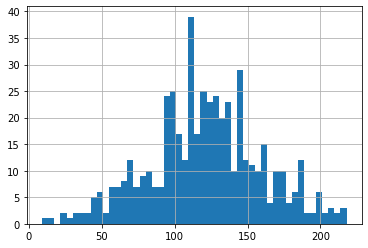

In [113]:
f['LoanAmount'].hist(bins=50)

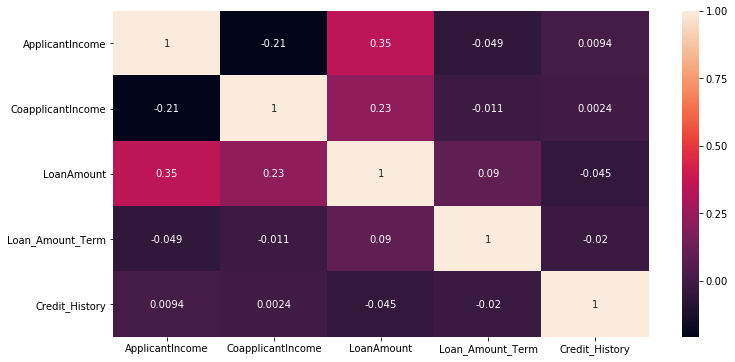

In [114]:
plt.figure(figsize=(12,6))
sns.heatmap(f.corr(),annot=True)

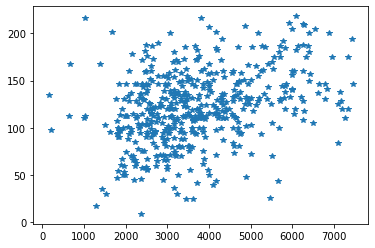

In [115]:
plt.plot(f.ApplicantIncome,f["LoanAmount"],'*')

In [116]:
f.Loan_Status.value_counts()

Y    344
N    156
Name: Loan_Status, dtype: int64

In [117]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
     f[i] = le.fit_transform(f[i])
f.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

# Generic Classification Function


In [118]:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))


# Model Building

In [119]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%


In [120]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, f,predictor_var,outcome_var)

Accuracy : 81.800%


In [87]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
classification_model(model, f,predictor_var,outcome_var)

Accuracy : 88.200%


 # REGRESSION          =  80.945%
 
 # DECISION TREE      =  81.2%
 
 # RAMDON FOREST  =  88.2%